# Mini Project 1

Team Members:Adit Mehta, Adit Misar, Alex Blum


In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df=pd.read_csv("Steel_Plate.csv")

In [6]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,1.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [7]:
df_defcount=df.iloc[:,27:34].apply(pd.value_counts)
count=df_defcount.assign(OtherType1=df_defcount.iloc[1,-1]).assign(OtherType2=df_defcount.iloc[2,-1]).drop(["Class"],axis=1).drop([0,2],axis=0).T
count["Name of defect"]=count.index.values
count.columns.values[0]="Num hits"

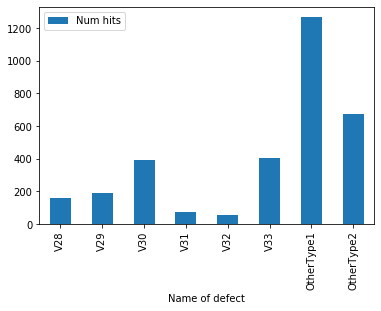

In [8]:
%matplotlib inline
count.plot.bar(x="Name of defect", y="Num hits")

In [9]:
# Drops one hot coded columns, known redundant V13 column, and changes response class to 0 & 1 from 1 & 2
df.drop(['V28','V29','V30','V31','V32','V33','V13'],inplace=True,axis=1)
df["Class"] -=1

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
scaler.fit(df.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
scaled_features = scaler.transform(df.drop('Class',axis=1))
X=scaled_features
y=df['Class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Class'], test_size=0.25,random_state=99)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [26]:
from sklearn.model_selection import KFold

In [28]:
inner_cv = KFold(n_splits=5, shuffle=True)

In [29]:
eu_knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

In [30]:
grid_params={'n_neighbors':list(range(1, 14)),'weights':['uniform','distance']}

In [45]:
clf = GridSearchCV(estimator=eu_knn, param_grid=grid_params, n_jobs=-1, cv=inner_cv).fit(X,y)
clf.best_estimator_.n_neighbors

6

In [24]:
k_limit=35
accuracy_eu=[]
accuracy_mh=[]
error_rate_eu = []
error_rate_mh = []

for i in range(1,k_limit):
    
    eu_knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski')
    mh_knn = KNeighborsClassifier(n_neighbors=i, p=1, metric='minkowski')
    eu_knn.fit(X_train,y_train)
    mh_knn.fit(X_train,y_train)
    pred1 = eu_knn.predict(X_test)
    pred2 = mh_knn.predict(X_test)
    error_rate_eu.append(np.mean(pred1 != y_test))
    error_rate_mh.append(np.mean(pred2 != y_test))
    accuracy_eu.append(accuracy_score(y_test,pred1))
    accuracy_mh.append(accuracy_score(y_test,pred2))

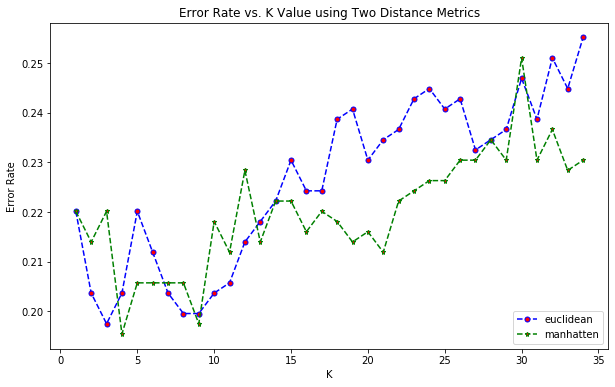

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,k_limit),error_rate_eu,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5, label="euclidean")
plt.plot(range(1,k_limit),error_rate_mh,color='green', linestyle='dashed', marker='*', markerfacecolor='red', markersize=5, label="manhatten")
plt.title('Error Rate vs. K Value using Two Distance Metrics')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.legend(loc="lower right")

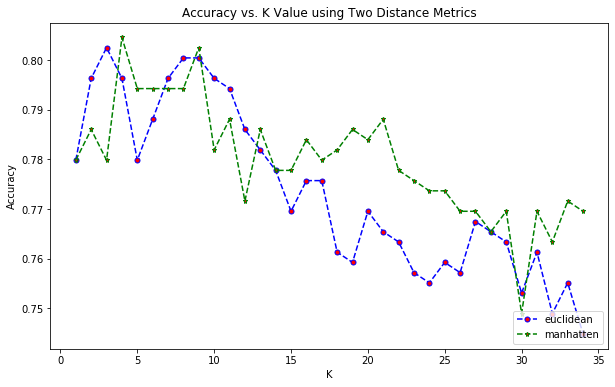

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,k_limit),accuracy_eu,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5, label="euclidean")
plt.plot(range(1,k_limit),accuracy_mh,color='green', linestyle='dashed', marker='*', markerfacecolor='red', markersize=5, label="manhatten")
plt.title('Accuracy vs. K Value using Two Distance Metrics')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")

for k= 9  both manhatten and euclidean distance measure, we are getting the best accuracy and lowest error rate and after the point, the error rate keeps increasing.
Remake the model with k=9 and create confusion matrix.


In [28]:
eu_knn = KNeighborsClassifier(n_neighbors=9, p=2, metric='minkowski')
mh_knn = KNeighborsClassifier(n_neighbors=9, p=1, metric='minkowski')
eu_knn.fit(X_train,y_train)
mh_knn.fit(X_train,y_train)
pred9e = eu_knn.predict(X_test)
pred9m = mh_knn.predict(X_test)
print("euclidean -- > ", accuracy_score(y_test,pred9e)," \n", confusion_matrix(y_test,pred9e),'\n',"manhatten -- > ", accuracy_score(y_test,pred9m)," \n",confusion_matrix(y_test,pred9m))

euclidean -- >  0.8004115226337448  
 [[291  35]
 [ 62  98]] 
 manhatten -- >  0.8024691358024691  
 [[290  36]
 [ 60 100]]


# Feature Importance Study 

VARIANCE THRESHOLDING

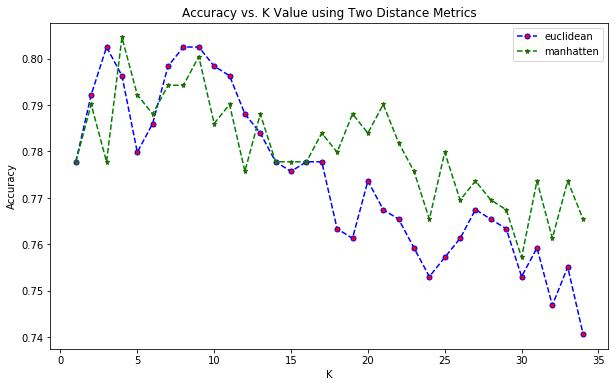

In [29]:
#checking the variance of each feature column to measure predictive power
lowvar=df.var().sort_values().index.values[0]
#in our case, we are only dropping the column with lowest variance, selected above as .values[0]
df1=df.drop(columns=lowvar)
#remaking model
scaler.fit(df1.drop('Class',axis=1))
scaled_features1 = scaler.transform(df1.drop('Class',axis=1))
X_train, X_test, y_train, y_test = train_test_split(scaled_features1,df1['Class'],test_size=0.25,random_state=99)
k_limit=35
accuracy_eu=[]
accuracy_mh=[]
error_rate_eu = []
error_rate_mh = []

for i in range(1,k_limit):
    
    eu_knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski')
    mh_knn = KNeighborsClassifier(n_neighbors=i, p=1, metric='minkowski')
    eu_knn.fit(X_train,y_train)
    mh_knn.fit(X_train,y_train)
    pred1 = eu_knn.predict(X_test)
    pred2 = mh_knn.predict(X_test)
    error_rate_eu.append(np.mean(pred1 != y_test))
    error_rate_mh.append(np.mean(pred2 != y_test))
    accuracy_eu.append(accuracy_score(y_test,pred1))
    accuracy_mh.append(accuracy_score(y_test,pred2))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,k_limit),accuracy_eu,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5, label="euclidean")
plt.plot(range(1,k_limit),accuracy_mh,color='green', linestyle='dashed', marker='*', markerfacecolor='red', markersize=5, label="manhatten")
plt.title('Accuracy vs. K Value using Two Distance Metrics')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(loc="upper right")    

In [31]:
lowvar

'V18'

Therefore we see that it is possible to drop 'V18' column based on variance thresholding

CORRELATION 

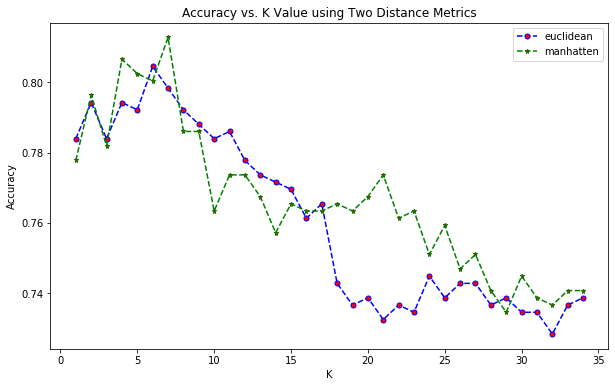

In [40]:
#most correlated column to response class
#removing least two correlated column, in our case : 'V10' and 'V12' which gets removed below in 
# ... in the selection .iloc[1:25]
cor_cols=df.corr()["Class"].abs().sort_values(ascending=False).iloc[1:25].index.values
df2=df[cor_cols].assign(Class=df["Class"])
#remaking model
scaler.fit(df2.drop('Class',axis=1))
scaled_features2 = scaler.transform(df2.drop('Class',axis=1))
X_train, X_test, y_train, y_test = train_test_split(scaled_features2,df2['Class'],test_size=0.25,random_state=99)
k_limit=35
accuracy_eu=[]
accuracy_mh=[]
error_rate_eu = []
error_rate_mh = []

for i in range(1,k_limit):
    
    eu_knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski')
    mh_knn = KNeighborsClassifier(n_neighbors=i, p=1, metric='minkowski')
    eu_knn.fit(X_train,y_train)
    mh_knn.fit(X_train,y_train)
    pred1 = eu_knn.predict(X_test)
    pred2 = mh_knn.predict(X_test)
    error_rate_eu.append(np.mean(pred1 != y_test))
    error_rate_mh.append(np.mean(pred2 != y_test))
    accuracy_eu.append(accuracy_score(y_test,pred1))
    accuracy_mh.append(accuracy_score(y_test,pred2))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,k_limit),accuracy_eu,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5, label="euclidean")
plt.plot(range(1,k_limit),accuracy_mh,color='green', linestyle='dashed', marker='*', markerfacecolor='red', markersize=5, label="manhatten")
plt.title('Accuracy vs. K Value using Two Distance Metrics')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(loc="upper right")    


Therefore we can see that we can reduce two more features and with k=6, the model still has similar accuracy score.
